In [1]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
!unzip kagglecatsanddogs_3367a.zip

--2018-08-23 14:55:22--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 173.222.101.133, 2600:1400:c000:3b5::e59, 2600:1400:c000:382::e59
Connecting to download.microsoft.com (download.microsoft.com)|173.222.101.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_3367a.zip’

kagglecatsanddogs_3 100%[===================>] 786.68M  84.3MB/s    in 9.5s    

2018-08-23 14:55:32 (82.5 MB/s) - ‘kagglecatsanddogs_3367a.zip’ saved [824894548/824894548]

Archive:  kagglecatsanddogs_3367a.zip
   creating: PetImages/Cat/
  inflating: PetImages/Cat/0.jpg     
  inflating: PetImages/Cat/1.jpg     
  inflating: PetImages/Cat/10.jpg    
  inflating: PetImages/Cat/100.jpg   
  inflating: PetImages/Cat/1000.jpg  
  inflating: PetImages/Cat/10000.jpg  
  inflating: PetImages/Cat/100

In [2]:
!ls PetImages
CATEGORIES = ['Dog','Cat']
path = 'PetImages'
IMG_DIM = 100

Cat  Dog


In [3]:
import os
import cv2
import matplotlib.pyplot as plt
training_data = []
bad_images=0
for category in CATEGORIES:
  for img_path in os.listdir(os.path.join(path,category)):
    try:
      img_array = cv2.imread(os.path.join(path,category,img_path),cv2.IMREAD_GRAYSCALE)
      resized_img = cv2.resize(img_array,(IMG_DIM,IMG_DIM))
      training_data.append((resized_img,CATEGORIES.index(category)))
    except:
      bad_images+=1
print(len(training_data),bad_images)

24946 56


In [4]:
import random
import numpy as np
random.shuffle(training_data)
X = []
y = []
for img_arr,label in training_data:
  X.append(img_arr)
  y.append(label)

X = np.array(X)
y = np.array(y)
print(X.shape,y.shape)

(24946, 100, 100) (24946,)


In [5]:
from keras.utils import to_categorical
X = X.reshape(-1,IMG_DIM,IMG_DIM,1)/255
y = to_categorical(y,len(CATEGORIES))

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Activation,Dropout

model = Sequential()

model.add(Conv2D(128, (3,3) ,input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(528))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(len(CATEGORIES)))
model.add(Activation('sigmoid'))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [0]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
model_checkpoint = ModelCheckpoint("dogvscat.hdf5",monitor="val_acc",mode="max",verbose=1,save_best_only=True)
early_stopping = EarlyStopping(monitor="val_loss",patience=5)
callback_list = [model_checkpoint,early_stopping]

In [8]:
BATCH_SIZE = 128
EPOCHS = 20
model.fit(X,y,
          epochs=EPOCHS,
          callbacks=callback_list,
          batch_size=BATCH_SIZE,
         validation_split=0.2,
         verbose=1)


Train on 19956 samples, validate on 4990 samples
Epoch 1/20
19956/19956 [==============================] - 44s 2ms/step - loss: 0.6667 - acc: 0.5863 - val_loss: 0.6400 - val_acc: 0.6505

Epoch 00001: val_acc improved from -inf to 0.65050, saving model to dogvscat.hdf5
Epoch 2/20
19956/19956 [==============================] - 40s 2ms/step - loss: 0.5662 - acc: 0.7074 - val_loss: 0.5367 - val_acc: 0.7311

Epoch 00002: val_acc improved from 0.65050 to 0.73106, saving model to dogvscat.hdf5
Epoch 3/20
19956/19956 [==============================] - 40s 2ms/step - loss: 0.4936 - acc: 0.7585 - val_loss: 0.4850 - val_acc: 0.7629

Epoch 00003: val_acc improved from 0.73106 to 0.76293, saving model to dogvscat.hdf5
Epoch 4/20
19956/19956 [==============================] - 40s 2ms/step - loss: 0.4381 - acc: 0.7951 - val_loss: 0.4738 - val_acc: 0.7705

Epoch 00004: val_acc improved from 0.76293 to 0.77054, saving model to dogvscat.hdf5
Epoch 5/20
19956/19956 [==============================] - 40s 

In [0]:
def prepare_img_for_prediction(path):
  img_array = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
  resized_img = cv2.resize(img_array,(IMG_DIM,IMG_DIM))
  X = np.reshape(resized_img,(1,IMG_DIM,IMG_DIM,1))
  return X

Saving dog_1.jpeg to dog_1.jpeg


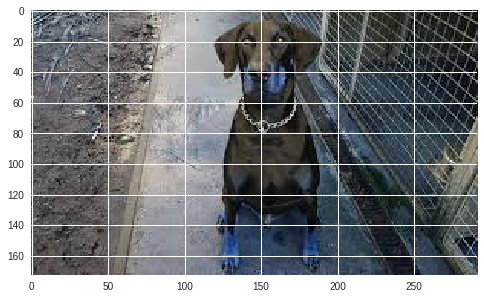

This looks like an Dog


In [11]:
#testing Dog
from google.colab import files
path = list(files.upload().keys())[0]
img = cv2.imread(path)
plt.imshow(img)
plt.show()
test = prepare_img_for_prediction(path)
category = CATEGORIES[np.argmax(model.predict(test))]
print("This looks like an {}".format(category))

Saving cat_1.jpeg to cat_1.jpeg


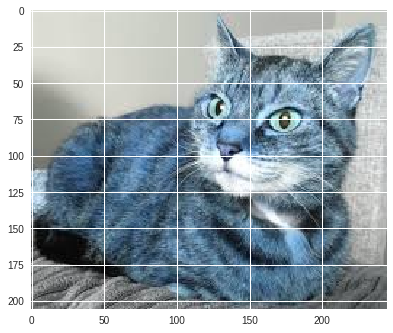

This looks like an Cat


In [12]:
#testing Cat
from google.colab import files
path = list(files.upload().keys())[0]
img = cv2.imread(path)
plt.imshow(img)
plt.show()
test = prepare_img_for_prediction(path)
category = CATEGORIES[np.argmax(model.predict(test))]
print("This looks like an {}".format(category))